In [1]:
import pymssql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import time
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

%matplotlib inline

In [2]:
import time
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

from xgboost import XGBRegressor
from xgboost import plot_importance

# Function to plot feature importance
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
def create_date_featues(df):

    df['Year'] = pd.to_datetime(df['DT']).dt.year
    df['Month'] = pd.to_datetime(df['DT']).dt.month
    df['Quarter'] = df['DT'].dt.quarter
    
    return df

def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

import datetime
def _getToday():
        return datetime.date.today().strftime("%Y%m%d")

In [5]:
begindate='2018-01-01'
traindate ='2021-05-01'
testdate='2021-06-01'

In [6]:
#Destination of file exporting
outpath = r'\\clst-mdc01fil01.pac.bvcorp.corp\Budget\CIF\Power BI Project\0. PBI Projects\Payroll Forecasting\Source Tables_Test'

# Query from Sql Server 

In [7]:
con = pymssql.connect(server='S12AUMDC01SQL02', user ='PAC\wenlzhang', password ='Abcd_1234J', database ='PBI_Team_Dev')

In [8]:
cursor =con.cursor()
query = "select * from [PBI_Team_Dev].[RPC21021601].[vPR_F]"
cursor.execute(query)

In [9]:
F0902 = cursor.fetchall()
    
con.close()

In [10]:
df_0902 = pd.DataFrame(F0902)
df_0902.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,2019-01-01,00028,028000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2019-02-01,00028,028000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-03-01,00028,028000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2019-04-01,00028,028000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2019-05-01,00028,028000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df_0902=df_0902_BK

In [14]:
df_0902_BK = df_0902
df_0902.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10342 entries, 0 to 10341
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10342 non-null  object
 1   1       10342 non-null  object
 2   2       10342 non-null  object
 3   3       10342 non-null  object
 4   4       10342 non-null  object
 5   5       10342 non-null  object
 6   6       10342 non-null  object
 7   7       10342 non-null  object
 8   8       10342 non-null  object
 9   9       10342 non-null  object
 10  10      10342 non-null  object
 11  11      10342 non-null  object
 12  12      10342 non-null  object
 13  13      10342 non-null  object
 14  14      10342 non-null  object
 15  15      10342 non-null  object
 16  16      10342 non-null  object
 17  17      10342 non-null  object
 18  18      10342 non-null  object
 19  19      10342 non-null  object
 20  20      10342 non-null  int64 
 21  21      10342 non-null  int64 
 22  22      10342 non-null

In [15]:
#Triming dataset
df_0902 = trim_all_columns(df_0902)
df_0902[1] = df_0902[1].str.strip()

In [16]:
df_0902[1] = df_0902[1].str.strip()

In [17]:
#Rename all columns 
df_0902 = df_0902.rename(columns ={0:'DT', 
                                   1:'MCCO', 
                                   2:'BU_REPORTED', 
                                   3:'REV', 
                                   4:'PROD',
                                   5:'7A', 
                                   6:'7B',
                                   7:'LABOUR',
                                   8:'7A1',
                                   9:'7A2',
                                   10:'7A3',
                                   11:'7A4',
                                   12:'7A5',
                                   13:'7A6',
                                   14:'7B1',
                                   15:'7B2',
                                   16:'7B3',
                                   17:'7B4',
                                   18:'7B5',
                                   19:'7B6',
                                   20:'PAYMENT_W',
                                   21:'PAYMENT_F',
                                   22:'HOLIDAY_CNT'})

In [18]:
zero_list = ['029FUNC','993FUNC','030FUNC','108045','3943K0','4985X2','4077B1','108048','108000','108045']

In [19]:
df_0902.head()

,DT,MCCO,BU_REPORTED,REV,PROD,7A,7B,LABOUR,7A1,7A2,7A3,7A4,7A5,7A6,7B1,7B2,7B3,7B4,7B5,7B6,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT
0,2019-01-01,00028,028000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2019-02-01,00028,028000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-03-01,00028,028000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2019-04-01,00028,028000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2019-05-01,00028,028000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
cols = df_0902.columns.drop(['DT','MCCO','BU_REPORTED'])
df_0902[cols]=df_0902[cols].apply(pd.to_numeric,errors='coerce')

In [23]:
df_0902['DT'] = pd.to_datetime(df_0902['DT'])

In [137]:
cols


Index(['MCCO', 'BU_REPORTED', 'REV', 'PROD', '7A', '7B', 'LABOUR', '7A1',
       '7A2', '7A3', '7A4', '7A5', '7A6', '7B1', '7B2', '7B3', '7B4', '7B5',
       '7B6', 'PAYMENT_W', 'PAYMENT_F', 'HOLIDAY_CNT'],
      dtype='object')

In [267]:
df_0902.head()

,DT,MCCO,BU_REPORTED,REV,PROD,7A,7B,LABOUR,7A1,7A2,7A3,7A4,7A5,7A6,7B1,7B2,7B3,7B4,7B5,7B6,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT
0,2019-01-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,2019-02-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,2019-03-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,2019-04-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,2019-05-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [268]:
m_list =['295F02','295F01']

df_0902[df_0902['BU_REPORTED'].isin(m_list)]

,DT,MCCO,BU_REPORTED,REV,PROD,7A,7B,LABOUR,7A1,7A2,7A3,7A4,7A5,7A6,7B1,7B2,7B3,7B4,7B5,7B6,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT
3047,2019-01-01,00295,295F01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,1
3048,2019-02-01,00295,295F01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0
3049,2019-03-01,00295,295F01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,1
3050,2019-04-01,00295,295F01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,1
3051,2019-05-01,00295,295F01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0
3052,2019-06-01,00295,295F01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,1
3053,2019-07-01,00295,295F01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3054,2019-08-01,00295,295F01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0
3055,2019-09-01,00295,295F01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,1
3056,2019-10-01,00295,295F01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0


<AxesSubplot:xlabel='DT'>

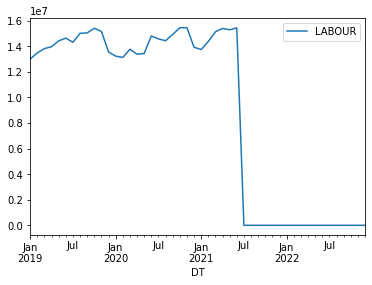

In [269]:
df_0902[df_0902['DT']>'2018-2-01'].set_index('DT').groupby(['DT']).sum().plot(y='LABOUR')

<AxesSubplot:xlabel='DT'>

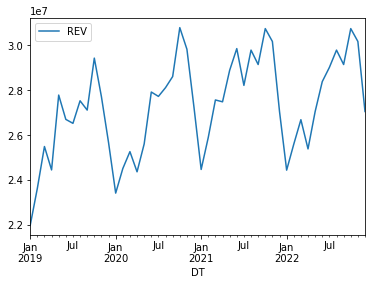

In [270]:
df_0902[df_0902['DT']>'2018-2-01'].set_index('DT').groupby(['DT']).sum().plot(y='REV')


<AxesSubplot:xlabel='DT'>

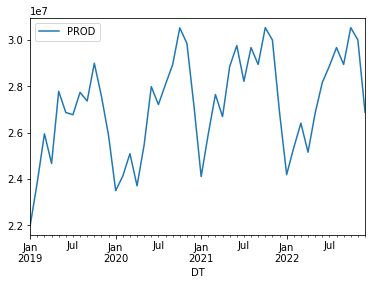

In [271]:
df_0902[df_0902['DT']>'2018-2-01'].set_index('DT').groupby(['DT']).sum().plot(y='PROD')


<AxesSubplot:xlabel='DT'>

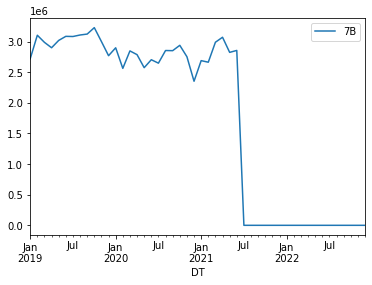

In [73]:
df_0902[df_0902['DT']>'2018-2-01'].set_index('DT').groupby(['DT']).sum().plot(y='7B')

<AxesSubplot:xlabel='DT'>

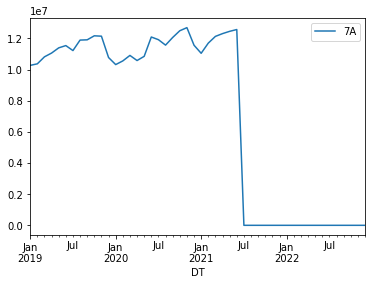

In [74]:
df_0902[df_0902['DT']>'2018-2-01'].set_index('DT').groupby(['DT']).sum().plot(y='7A')


<AxesSubplot:xlabel='DT'>

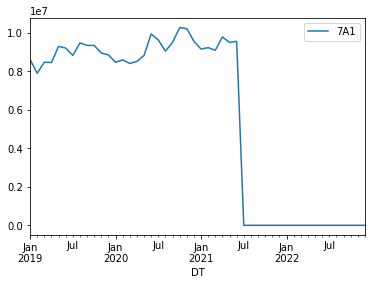

In [139]:
df_0902[df_0902['DT']>'2018-2-01'].set_index('DT').groupby(['DT']).sum().plot(y='7A1')

In [75]:
len(df_0902['BU_REPORTED'].unique())

226

In [155]:
df_0902[(df_0902['REV']!=0) & (df_0902['BU_REPORTED']=='0282S1')].corr()

,REV,PROD,7A,7B,LABOUR,7A1,7A2,7A3,7A4,7A5,7A6,7B1,7B2,7B3,7B4,7B5,7B6,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT
REV,1.000000,0.966662,-0.405374,-0.269485,-0.414900,-0.453530,-0.427308,NaN,0.272279,-0.350588,-0.088496,-0.317865,-0.248004,NaN,0.253035,-0.229224,-0.084170,NaN,NaN,-0.309876
PROD,0.966662,1.000000,-0.483390,-0.314934,-0.493593,-0.528162,-0.504736,NaN,0.216370,-0.410708,-0.122191,-0.391913,-0.258105,NaN,0.228020,-0.308506,-0.058868,NaN,NaN,-0.290372
7A,-0.405374,-0.483390,1.000000,0.463213,0.987136,0.991897,0.939089,NaN,0.173855,0.947724,0.519278,0.715566,0.196315,NaN,-0.062977,0.680999,0.109144,NaN,NaN,-0.036471
7B,-0.269485,-0.314934,0.463213,1.000000,0.598952,0.472578,0.487784,NaN,0.088303,0.362673,0.153782,0.781533,0.870153,NaN,0.263754,0.802893,0.063755,NaN,NaN,0.092071
LABOUR,-0.414900,-0.493593,0.987136,0.598952,1.000000,0.981504,0.936531,NaN,0.173020,0.921763,0.496946,0.787558,0.334366,NaN,-0.009321,0.760177,0.110121,NaN,NaN,-0.016344
7A1,-0.453530,-0.528162,0.991897,0.472578,0.981504,1.000000,0.946292,NaN,0.079741,0.926449,0.463159,0.707824,0.203225,NaN,-0.026024,0.678971,0.137710,NaN,NaN,0.001824
7A2,-0.427308,-0.504736,0.939089,0.487784,0.936531,0.946292,1.000000,NaN,0.125723,0.851459,0.345485,0.695454,0.218494,NaN,-0.005119,0.689638,0.256572,NaN,NaN,-0.038450
7A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7A4,0.272279,0.216370,0.173855,0.088303,0.173020,0.079741,0.125723,NaN,1.000000,0.157658,-0.047826,0.273381,0.043613,NaN,-0.318228,0.190620,-0.171726,NaN,NaN,-0.444821
7A5,-0.350588,-0.410708,0.947724,0.362673,0.921763,0.926449,0.851459,NaN,0.157658,1.000000,0.542189,0.672184,0.073867,NaN,-0.030725,0.666750,-0.009568,NaN,NaN,-0.072627


In [47]:
df_0902[(df_0902['REV']!=0) & (df_0902['BU_REPORTED']=='0282S1')].groupby(['DT']).sum().corr()

,REV,7A,7B,LABOUR,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT
REV,1.000000,-0.405374,-0.269485,-0.414900,NaN,NaN,-0.309876
7A,-0.405374,1.000000,0.463213,0.987136,NaN,NaN,-0.036471
7B,-0.269485,0.463213,1.000000,0.598952,NaN,NaN,0.092071
LABOUR,-0.414900,0.987136,0.598952,1.000000,NaN,NaN,-0.016344
PAYMENT_W,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAYMENT_F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HOLIDAY_CNT,-0.309876,-0.036471,0.092071,-0.016344,NaN,NaN,1.000000


In [53]:
df_r_3 = df_r_3[df_r_3['GL_Date']>=begindate]
g_0902 = g_0902[g_0902['GL_Date']>=begindate]
g_0902_L = g_0902_L[g_0902_L['GL_Date']>=begindate]

In [24]:
df_forecast = df_0902.copy()

# Correlation

,DT,MCCO,BU_REPORTED,REV,PROD,7A,7B,LABOUR,7A1,7A2,7A3,7A4,7A5,7A6,7B1,7B2,7B3,7B4,7B5,7B6,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT
7982,2019-01-01,00954,9540EX01,0.0,0.0,0.0,43323.0,43323.0,0.0,0.0,0.0,0.0,0.0,0.0,28619.0,4630.0,0.0,-4198.0,3445.0,10827.0,0,3,1
7983,2019-02-01,00954,9540EX01,0.0,0.0,0.0,36927.0,36927.0,0.0,0.0,0.0,0.0,0.0,0.0,24640.0,3887.0,0.0,-5276.0,2849.0,10827.0,0,3,0
7984,2019-03-01,00954,9540EX01,0.0,0.0,0.0,53553.0,53553.0,0.0,0.0,0.0,0.0,0.0,0.0,25339.0,3502.0,0.0,1357.0,2877.0,20478.0,0,2,1
7985,2019-04-01,00954,9540EX01,0.0,0.0,0.0,48358.0,48358.0,0.0,0.0,0.0,0.0,0.0,0.0,27381.0,5629.0,0.0,187.0,7570.0,7591.0,0,2,1
7986,2019-05-01,00954,9540EX01,0.0,0.0,0.0,75834.0,75834.0,0.0,0.0,0.0,0.0,0.0,0.0,34469.0,16607.0,0.0,4744.0,6271.0,13743.0,0,2,0
7987,2019-06-01,00954,9540EX01,0.0,0.0,0.0,42753.0,42753.0,0.0,0.0,0.0,0.0,0.0,0.0,30217.0,4137.0,0.0,-4170.0,972.0,11597.0,0,2,1
7988,2019-07-01,00954,9540EX01,0.0,0.0,0.0,53687.0,53687.0,0.0,0.0,0.0,0.0,0.0,0.0,33968.0,8972.0,0.0,-2858.0,2008.0,11597.0,0,0,0
7989,2019-08-01,00954,9540EX01,0.0,0.0,0.0,46103.0,46103.0,0.0,0.0,0.0,0.0,0.0,0.0,27604.0,4707.0,0.0,-920.0,3115.0,11597.0,0,2,0
7990,2019-09-01,00954,9540EX01,0.0,0.0,0.0,47630.0,47630.0,0.0,0.0,0.0,0.0,0.0,0.0,25917.0,4600.0,0.0,2561.0,2955.0,11597.0,0,2,1
7991,2019-10-01,00954,9540EX01,0.0,0.0,0.0,54476.0,54476.0,0.0,0.0,0.0,0.0,0.0,0.0,34566.0,5459.0,0.0,-920.0,3774.0,11597.0,0,2,0


# PROD VS. TOTAL LINE 7 FINAL

In [158]:
df_forecast.head()

,DT,MCCO,BU_REPORTED,REV,PROD,7A,7B,LABOUR,7A1,7A2,7A3,7A4,7A5,7A6,7B1,7B2,7B3,7B4,7B5,7B6,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT
0,2019-01-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,2019-02-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,2019-03-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,2019-04-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,2019-05-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [159]:
df_forecast.corr()

,REV,PROD,7A,7B,LABOUR,7A1,7A2,7A3,7A4,7A5,7A6,7B1,7B2,7B3,7B4,7B5,7B6,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT
REV,1.000000,0.994664,0.719221,0.168879,0.694664,0.697137,0.664263,NaN,0.104018,0.563419,0.168887,0.183827,0.143417,NaN,-0.002172,0.057807,0.015545,0.064359,0.165984,0.254915
PROD,0.994664,1.000000,0.725296,0.170576,0.700601,0.704885,0.673101,NaN,0.107084,0.560696,0.166985,0.187656,0.145940,NaN,-0.002091,0.056506,0.015678,0.062660,0.166124,0.254820
7A,0.719221,0.725296,1.000000,0.247961,0.969201,0.981342,0.922393,NaN,0.138298,0.742500,0.239664,0.304084,0.225366,NaN,-0.009581,0.050916,0.038161,0.188834,0.222940,0.206240
7B,0.168879,0.170576,0.247961,1.000000,0.478905,0.241086,0.257989,NaN,0.066998,0.177079,0.071930,0.667686,0.457124,NaN,0.113525,0.697290,0.246051,0.129064,0.066413,0.098621
LABOUR,0.694664,0.700601,0.969201,0.478905,1.000000,0.950545,0.901425,NaN,0.142352,0.717844,0.235461,0.445284,0.320425,NaN,0.020177,0.223397,0.097129,0.203925,0.218904,0.211959
7A1,0.697137,0.704885,0.981342,0.241086,0.950545,1.000000,0.918796,NaN,0.089040,0.606017,0.217748,0.306256,0.231000,NaN,-0.013291,0.038994,0.039752,0.185662,0.216206,0.215819
7A2,0.664263,0.673101,0.922393,0.257989,0.901425,0.918796,1.000000,NaN,0.078750,0.607158,0.203408,0.333719,0.229398,NaN,-0.007938,0.036920,0.044196,0.176272,0.189286,0.233010
7A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7A4,0.104018,0.107084,0.138298,0.066998,0.142352,0.089040,0.078750,NaN,1.000000,0.102792,0.014827,0.062966,0.033157,NaN,0.046792,0.024528,0.008065,-0.012316,-0.015455,-0.019409
7A5,0.563419,0.560696,0.742500,0.177079,0.717844,0.606017,0.607158,NaN,0.102792,1.000000,0.171580,0.178395,0.122430,NaN,-0.002004,0.074989,0.022641,0.147099,0.186925,0.102637


In [160]:
Labour = df_forecast.drop(columns=['REV','7A','7B','MCCO','7A1','7A2','7A3','7A4','7A5','7A6','7B1','7B2','7B3','7B4','7B5','7B6'])

In [95]:
Labour_BK=Labour.copy()
Labour.head()

,DT,BU_REPORTED,PROD,LABOUR,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT
0,2019-01-01,028000,0.0,0.0,0,0,1
1,2019-02-01,028000,0.0,0.0,0,0,0
2,2019-03-01,028000,0.0,0.0,0,0,1
3,2019-04-01,028000,0.0,0.0,0,0,1
4,2019-05-01,028000,0.0,0.0,0,0,0


In [96]:
#date features
data=Labour.copy()
data=create_date_featues(data)
data.head()


,DT,BU_REPORTED,PROD,LABOUR,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT,Year,Month,Quarter
0,2019-01-01,028000,0.0,0.0,0,0,1,2019,1,1
1,2019-02-01,028000,0.0,0.0,0,0,0,2019,2,1
2,2019-03-01,028000,0.0,0.0,0,0,1,2019,3,1
3,2019-04-01,028000,0.0,0.0,0,0,1,2019,4,2
4,2019-05-01,028000,0.0,0.0,0,0,0,2019,5,2


In [97]:
month_in_year = 12
quater_in_year =4

data['sin_month'] = np.sin(2*np.pi*data['Month']/month_in_year)
data['cos_month'] = np.cos(2*np.pi*data['Month']/month_in_year)
data['sin_quater'] = np.sin(2*np.pi*data['Quarter']/quater_in_year)
data['cos_quater'] = np.cos(2*np.pi*data['Quarter']/quater_in_year)

data.drop('Month', axis=1, inplace=True)
data.drop('Quarter', axis=1, inplace=True)



In [98]:
data_BK=data


columns = ['ID','DT','LABOUR', 'PROD', 'Prediction']
df_final=pd.DataFrame(columns=columns)

id_list=data['BU_REPORTED'].unique()


In [99]:
for ID in id_list:
    data_model = data[data['BU_REPORTED']==ID]
    # if we have data for 2020 
    del data_model['BU_REPORTED']
    if len(data_model[data_model['DT']>'2019-12-02'])> 0:
        train=data_model[data_model['DT']<=traindate]
        test=data_model[data_model['DT']>=testdate]
        train.set_index(['DT'],inplace=True)
        test.set_index(['DT'],inplace=True)
        x_train=train.drop(columns={'LABOUR'},axis=1)
        y_train=train.loc[:,['LABOUR']]
        x_test=test.drop(columns={'LABOUR'},axis=1)
        y_test=test.loc[:,['LABOUR']]
        reg = xgb.XGBRegressor(n_estimators=1000)
        reg.fit(x_train, y_train, 
                eval_set=[(x_train, y_train)],
                early_stopping_rounds=50,
                verbose=False) 
        test['Prediction'] = reg.predict(x_test)
        df=test
        df['ID']=ID
        df_final=df_final.append(df)
        print(reg.feature_importances_)
    else: df_final=df_final

Empty dataset at worker: 0
[14:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[14:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[14:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[14:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[14:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[14:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[14:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[14:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [87]:
"""
#Sin Cos encoding
month_in_year = 12
quater_in_year =4

data['sin_month'] = np.sin(2*np.pi*data['Month']/month_in_year)
data['cos_month'] = np.cos(2*np.pi*data['Month']/month_in_year)
data['sin_quater'] = np.sin(2*np.pi*data['Quarter']/quater_in_year)
data['cos_quater'] = np.cos(2*np.pi*data['Quarter']/quater_in_year)

data.drop('Month', axis=1, inplace=True)
data.drop('Quarter', axis=1, inplace=True)

data_backup=data

#standadising
a=scaler.fit_transform(data[['Rev_mean']])
a=pd.DataFrame(a, columns = ['Rev'])
b=scaler.fit_transform(data[['Year']])
b=pd.DataFrame(b, columns = ['YYYY'])
data = pd.concat([data,a], axis=1)
data = pd.concat([data,b], axis=1)
del data['Rev_mean']
del data['Year']


columns = ['ID','GL_Date','Payroll Cost_sum', 'Rev', 'Prediction']
df_final=pd.DataFrame(columns=columns)

id_list=data['BU_REPORTED'].unique()


for ID in id_list:
    data_model = data[data['BU_REPORTED']==ID]
    # if we have data for 2020 
    del data_model['BU_REPORTED']
    if len(data_model[data_model['GL_Date']>'2019-12-02'])> 0:
        train=data_model[data_model['GL_Date']<=traindate]
        test=data_model[data_model['GL_Date']>=testdate]
        train.set_index(['GL_Date'],inplace=True)
        test.set_index(['GL_Date'],inplace=True)
        x_train=train.drop(columns={'Payroll Cost_sum'},axis=1)
        y_train=train.loc[:,['Payroll Cost_sum']]
        x_test=test.drop(columns={'Payroll Cost_sum'},axis=1)
        y_test=test.loc[:,['Payroll Cost_sum']]
        reg = xgb.XGBRegressor(n_estimators=1000)
        reg.fit(x_train, y_train, 
                eval_set=[(x_train, y_train)],
                early_stopping_rounds=50,
                verbose=False) 
        test['Prediction'] = reg.predict(x_test)
        df=test
        df['ID']=ID
        df_final=df_final.append(df)
        print(reg.feature_importances_)
    else: df_final=df_final



<ipython-input-87-037d6822814b>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = reg.predict(x_test)
<ipython-input-87-037d6822814b>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID']=ID


[0.525643   0.         0.         0.         0.         0.
 0.47435698 0.         0.         0.         0.        ]
[0.5256431 0.        0.        0.        0.        0.        0.4743568
 0.        0.        0.        0.       ]
[0.7082936  0.03531559 0.06585434 0.         0.         0.05004936
 0.08064881 0.01119059 0.03256637 0.01608132 0.        ]
[1.2763071e-01 1.6240160e-03 3.5697248e-02 0.0000000e+00 0.0000000e+00
 1.7832041e-02 6.7868069e-02 1.3034450e-04 1.2236157e-02 7.3698133e-01
 0.0000000e+00]
[nan nan nan nan nan nan nan nan nan nan nan]
[0.31280723 0.01386005 0.         0.         0.         0.
 0.6646519  0.         0.00868083 0.         0.        ]


C:\Users\wenlzhang\Anaconda3\lib\site-packages\xgboost\sklearn.py:745: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


[2.4945582e-01 5.9185985e-02 2.8267063e-06 0.0000000e+00 0.0000000e+00
 5.5565294e-02 1.9616513e-02 2.0433225e-01 4.0252972e-01 9.3115643e-03
 0.0000000e+00]
[0.60145295 0.00108809 0.01764985 0.         0.         0.04686648
 0.08306812 0.         0.1711819  0.07869268 0.        ]
[0.05959802 0.00362431 0.01929149 0.         0.         0.00268518
 0.02232631 0.0611911  0.34050012 0.49078342 0.        ]
[0.88209355 0.00844143 0.00556819 0.         0.         0.03268986
 0.02993871 0.00653823 0.0179635  0.01676647 0.        ]
[nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan]
[0.31863484 0.09586415 0.28546217 0.         0.         0.04391937
 0.02728947 0.01736189 0.00960894 0.20185915 0.        ]
[7.3562555e-02 6.8761637e-03 2.5276940e-03 0.0000000e+00 0.0000000e+00
 5.8629415e-03 1.5449894e-02 1.3974847e-04 8.2453161e-02 8.1312788e-01
 0.0000000e+00]
[0.5422256  0.         0.         0.         0.         0.
 0.45777443 0.         0.         0. 

[0.02855372 0.00630981 0.18835351 0.         0.         0.02963444
 0.06075708 0.00084894 0.6564338  0.02910862 0.        ]
[0.03698347 0.00505769 0.03262555 0.         0.         0.04046325
 0.02918142 0.06413388 0.2721882  0.51936656 0.        ]
[0.05968167 0.00864616 0.0111485  0.         0.         0.0323679
 0.3009085  0.3712571  0.04709797 0.16889215 0.        ]
[9.9997920e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 7.0315050e-06 1.0075473e-13 1.0335368e-13 1.3781892e-05 0.0000000e+00
 0.0000000e+00]
[1.4920849e-01 3.4800298e-03 4.6785772e-01 0.0000000e+00 0.0000000e+00
 2.5598176e-02 2.1347381e-01 3.3635800e-03 5.0235052e-05 1.3696796e-01
 0.0000000e+00]
[0.24356505 0.02432924 0.02592099 0.         0.         0.21328156
 0.10081264 0.00562312 0.00461462 0.38185278 0.        ]
[0.49658343 0.00569836 0.18241483 0.         0.         0.0218066
 0.1374318  0.06569233 0.0513362  0.03903641 0.        ]
[5.9515070e-02 1.9567577e-02 4.4159628e-06 0.0000000e+00 0.0000000

 0.04147656 0.01218022 0.74775094 0.05060098 0.        ]
[0.18190393 0.03972004 0.03746223 0.         0.         0.2813629
 0.32848477 0.00691424 0.02091277 0.10323915 0.        ]
[0.15216562 0.19683097 0.21116127 0.         0.         0.04554394
 0.05811723 0.20873114 0.02613182 0.10131792 0.        ]
[0.20626205 0.03642775 0.32617036 0.         0.         0.05169029
 0.04233021 0.3087826  0.02833674 0.         0.        ]
[5.9673648e-02 1.1993822e-01 1.0090401e-02 0.0000000e+00 0.0000000e+00
 1.3775252e-01 4.0764630e-01 8.3204873e-02 4.8677888e-05 1.8164544e-01
 0.0000000e+00]
[0.25865144 0.01158032 0.27153304 0.         0.         0.04847736
 0.04587537 0.28242022 0.08146229 0.         0.        ]
[0.0908843  0.03820531 0.16393745 0.         0.         0.31624308
 0.11170721 0.01983066 0.18184489 0.07734713 0.        ]
[nan nan nan nan nan nan nan nan nan nan nan]
[0.03085764 0.02592132 0.06537366 0.         0.         0.08259546
 0.0786095  0.02718812 0.5598641  0.12959015 0.      

In [100]:
df_final['var'] = df_final['Prediction'] - df_final['LABOUR']
df_final_test = df_final.copy()

df_final_test.loc[((df_final_test['Prediction']<2) & (df_final_test['Prediction']>-2)), 'Prediction'] = 0
df_final_test.loc[df_final_test['ID'].isin(zero_list), 'Prediction'] = 0



filename = "%s_%s.%s" % ("Labour", _getToday() ,"csv")

df_final_test.to_csv(outpath + "\\" + filename)


# PROD VS. LINE 7A

In [51]:
A7 = df_forecast.copy()

In [52]:
A7.head()

,DT,MCCO,BU_REPORTED,REV,PROD,7A,7B,LABOUR,7A1,7A2,7A3,7A4,7A5,7A6,7B1,7B2,7B3,7B4,7B5,7B6,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT
0,2019-01-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,2019-02-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,2019-03-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,2019-04-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,2019-05-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [53]:
A7 = df_forecast.drop(columns=['REV','LABOUR','7B','MCCO','7A1','7A2','7A3','7A4','7A5','7A6','7B1','7B2','7B3','7B4','7B5','7B6'])

In [67]:
Labour_BK=A7.copy()
A7.head()

#date features
data=A7.copy()
data=create_date_featues(data)
data.head()


month_in_year = 12
quater_in_year =4

data['sin_month'] = np.sin(2*np.pi*data['Month']/month_in_year)
data['cos_month'] = np.cos(2*np.pi*data['Month']/month_in_year)
data['sin_quater'] = np.sin(2*np.pi*data['Quarter']/quater_in_year)
data['cos_quater'] = np.cos(2*np.pi*data['Quarter']/quater_in_year)

data.drop('Month', axis=1, inplace=True)
data.drop('Quarter', axis=1, inplace=True)


data_BK=data

columns = ['ID','DT','7A', 'PROD', 'Prediction']
df_final=pd.DataFrame(columns=columns)

id_list=data['BU_REPORTED'].unique()

for ID in id_list:
    data_model = data[data['BU_REPORTED']==ID]
    # if we have data for 2020 
    del data_model['BU_REPORTED']
    if len(data_model[data_model['DT']>'2019-12-02'])> 0:
        train=data_model[data_model['DT']<=traindate]
        test=data_model[data_model['DT']>=testdate]
        train.set_index(['DT'],inplace=True)
        test.set_index(['DT'],inplace=True)
        x_train=train.drop(columns={'7A'},axis=1)
        y_train=train.loc[:,['7A']]
        x_test=test.drop(columns={'7A'},axis=1)
        y_test=test.loc[:,['7A']]
        reg = xgb.XGBRegressor(n_estimators=1000)
        reg.fit(x_train, y_train, 
                eval_set=[(x_train, y_train)],
                early_stopping_rounds=50,
                verbose=False) 
        test['Prediction'] = reg.predict(x_test)
        df=test
        df['ID']=ID
        df_final=df_final.append(df)
        print(reg.feature_importances_)
    else: df_final=df_final

at worker: 0
[23:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[23:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[23:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[23:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[23:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[23:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[23:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[23:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src

In [57]:
df_final.head()

,ID,DT,7A,PROD,Prediction,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT,Year,sin_month,cos_month,sin_quater,cos_quater
2021-06-01,028000,NaN,0.0,0.0,3.986227e-07,0.0,0.0,1.0,2021.0,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00
2021-07-01,028000,NaN,0.0,0.0,3.986227e-07,0.0,0.0,0.0,2021.0,-5.000000e-01,-8.660254e-01,-1.000000e+00,-1.836970e-16
2021-08-01,028000,NaN,0.0,0.0,3.986227e-07,0.0,0.0,0.0,2021.0,-8.660254e-01,-5.000000e-01,-1.000000e+00,-1.836970e-16
2021-09-01,028000,NaN,0.0,0.0,3.986227e-07,0.0,0.0,1.0,2021.0,-1.000000e+00,-1.836970e-16,-1.000000e+00,-1.836970e-16
2021-10-01,028000,NaN,0.0,0.0,3.986227e-07,0.0,0.0,0.0,2021.0,-8.660254e-01,5.000000e-01,-2.449294e-16,1.000000e+00


In [68]:
cols =['ID','Prediction']
df_7A = df_final[cols]
df_7A['Line'] ='7A'
df_7A=df_7A.reset_index()
df_7A.loc[((df_7A['Prediction']<2) & (df_7A['Prediction']>-2)), 'Prediction'] = 0
df_7A.loc[df_7A['ID'].isin(zero_list), 'Prediction'] = 0

df_7A.head()



,index,ID,Prediction,Line
0,2021-06-01,028000,0.0,7A
1,2021-07-01,028000,0.0,7A
2,2021-08-01,028000,0.0,7A
3,2021-09-01,028000,0.0,7A
4,2021-10-01,028000,0.0,7A


# PROD VS. LINE 7B

In [59]:
B7 = df_forecast.copy()

In [60]:
B7.head()

,DT,MCCO,BU_REPORTED,REV,PROD,7A,7B,LABOUR,7A1,7A2,7A3,7A4,7A5,7A6,7B1,7B2,7B3,7B4,7B5,7B6,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT
0,2019-01-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,2019-02-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,2019-03-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,2019-04-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,2019-05-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [61]:
B7 = df_forecast.drop(columns=['REV','LABOUR','7A','MCCO','7A1','7A2','7A3','7A4','7A5','7A6','7B1','7B2','7B3','7B4','7B5','7B6'])

In [64]:
Labour_BK=B7.copy()
B7.head()

#date features
data=B7.copy()
data=create_date_featues(data)
data.head()


month_in_year = 12
quater_in_year =4

data['sin_month'] = np.sin(2*np.pi*data['Month']/month_in_year)
data['cos_month'] = np.cos(2*np.pi*data['Month']/month_in_year)
data['sin_quater'] = np.sin(2*np.pi*data['Quarter']/quater_in_year)
data['cos_quater'] = np.cos(2*np.pi*data['Quarter']/quater_in_year)

data.drop('Month', axis=1, inplace=True)
data.drop('Quarter', axis=1, inplace=True)


data_BK=data

columns = ['ID','DT','7B', 'PROD', 'Prediction']
df_final=pd.DataFrame(columns=columns)

id_list=data['BU_REPORTED'].unique()

for ID in id_list:
    data_model = data[data['BU_REPORTED']==ID]
    # if we have data for 2020 
    del data_model['BU_REPORTED']
    if len(data_model[data_model['DT']>'2019-12-02'])> 0:
        train=data_model[data_model['DT']<=traindate]
        test=data_model[data_model['DT']>=testdate]
        train.set_index(['DT'],inplace=True)
        test.set_index(['DT'],inplace=True)
        x_train=train.drop(columns={'7B'},axis=1)
        y_train=train.loc[:,['7B']]
        x_test=test.drop(columns={'7B'},axis=1)
        y_test=test.loc[:,['7B']]
        reg = xgb.XGBRegressor(n_estimators=1000)
        reg.fit(x_train, y_train, 
                eval_set=[(x_train, y_train)],
                early_stopping_rounds=50,
                verbose=False) 
        test['Prediction'] = reg.predict(x_test)
        df=test
        df['ID']=ID
        df_final=df_final.append(df)
        print(reg.feature_importances_)
    else: df_final=df_final

release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[23:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[23:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[23:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[23:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[23:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[23:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[23:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[23:35:56] WARNING: C:/Users/Admini

In [66]:
cols =['ID','Prediction']
df_7B = df_final[cols]
df_7B['Line'] ='7B'
df_7B=df_7B.reset_index()
df_7B.loc[((df_7B['Prediction']<2) & (df_7B['Prediction']>-2)), 'Prediction'] = 0
df_7B.loc[df_7B['ID'].isin(zero_list), 'Prediction'] = 0

df_7B.head()



C:\Users\wenlzhang\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,index,ID,Prediction,Line
0,2021-06-01,028000,0.0,7B
1,2021-07-01,028000,0.0,7B
2,2021-08-01,028000,0.0,7B
3,2021-09-01,028000,0.0,7B
4,2021-10-01,028000,0.0,7B


In [69]:


df_7A7B = pd.concat([df_7A, df_7B], axis =0)

filename = "%s_%s.%s" % ("7A7B", _getToday() ,"csv")

df_7A7B.to_csv(outpath + "\\" + filename)

# LINE LEVEL

In [25]:
df_forecast.head()

,DT,MCCO,BU_REPORTED,REV,PROD,7A,7B,LABOUR,7A1,7A2,7A3,7A4,7A5,7A6,7B1,7B2,7B3,7B4,7B5,7B6,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT
0,2019-01-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,2019-02-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,2019-03-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,2019-04-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,2019-05-01,00028,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [26]:
Line= df_forecast.copy

In [27]:
Line = df_forecast.drop(columns=['REV','LABOUR','7A','MCCO','7B'])
Line.head()


,DT,BU_REPORTED,PROD,7A1,7A2,7A3,7A4,7A5,7A6,7B1,7B2,7B3,7B4,7B5,7B6,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT
0,2019-01-01,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,2019-02-01,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,2019-03-01,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,2019-04-01,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,2019-05-01,028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [28]:
A71 = Line.drop(columns=['7A2','7A3','7A4','7A5','7A6','7B1','7B2','7B3','7B4','7B5','7B6'])
A72 = Line.drop(columns=['7A1','7A3','7A4','7A5','7A6','7B1','7B2','7B3','7B4','7B5','7B6'])
A74 = Line.drop(columns=['7A2','7A3','7A1','7A5','7A6','7B1','7B2','7B3','7B4','7B5','7B6'])
A75 = Line.drop(columns=['7A2','7A3','7A1','7A4','7A6','7B1','7B2','7B3','7B4','7B5','7B6'])
A76 = Line.drop(columns=['7A2','7A3','7A1','7A4','7A5','7B1','7B2','7B3','7B4','7B5','7B6'])
B71 = Line.drop(columns=['7A1','7A2','7A3','7A4','7A5','7A6','7B2','7B3','7B4','7B5','7B6'])
B72 = Line.drop(columns=['7A1','7A2','7A3','7A4','7A5','7A6','7B1','7B3','7B4','7B5','7B6'])
B74 = Line.drop(columns=['7A1','7A2','7A3','7A4','7A5','7A6','7B2','7B3','7B1','7B5','7B6'])
B75 = Line.drop(columns=['7A1','7A2','7A3','7A4','7A5','7A6','7B2','7B3','7B4','7B1','7B6'])
B76 = Line.drop(columns=['7A1','7A2','7A3','7A4','7A5','7A6','7B2','7B3','7B4','7B5','7B1'])

In [29]:
A71.head()

,DT,BU_REPORTED,PROD,7A1,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT
0,2019-01-01,028000,0.0,0.0,0,0,1
1,2019-02-01,028000,0.0,0.0,0,0,0
2,2019-03-01,028000,0.0,0.0,0,0,1
3,2019-04-01,028000,0.0,0.0,0,0,1
4,2019-05-01,028000,0.0,0.0,0,0,0


In [30]:
#7A1

#date features
data=A71.copy()
data=create_date_featues(data)
data.head()


month_in_year = 12
quater_in_year =4

data['sin_month'] = np.sin(2*np.pi*data['Month']/month_in_year)
data['cos_month'] = np.cos(2*np.pi*data['Month']/month_in_year)
data['sin_quater'] = np.sin(2*np.pi*data['Quarter']/quater_in_year)
data['cos_quater'] = np.cos(2*np.pi*data['Quarter']/quater_in_year)

data.drop('Month', axis=1, inplace=True)
data.drop('Quarter', axis=1, inplace=True)


data_BK=data

columns = ['ID','DT','7A1', 'PROD', 'Prediction']
df_final=pd.DataFrame(columns=columns)

id_list=data['BU_REPORTED'].unique()

for ID in id_list:
    data_model = data[data['BU_REPORTED']==ID]
    # if we have data for 2020 
    del data_model['BU_REPORTED']
    if len(data_model[data_model['DT']>'2019-12-02'])> 0:
        train=data_model[data_model['DT']<=traindate]
        test=data_model[data_model['DT']>=testdate]
        train.set_index(['DT'],inplace=True)
        test.set_index(['DT'],inplace=True)
        x_train=train.drop(columns={'7A1'},axis=1)
        y_train=train.loc[:,['7A1']]
        x_test=test.drop(columns={'7A1'},axis=1)
        y_test=test.loc[:,['7A1']]
        reg = xgb.XGBRegressor(n_estimators=1000)
        reg.fit(x_train, y_train, 
                eval_set=[(x_train, y_train)],
                early_stopping_rounds=50,
                verbose=False) 
        test['Prediction'] = reg.predict(x_test)
        df=test
        df['ID']=ID
        df_final=df_final.append(df)
        print(reg.feature_importances_)
    else: df_final=df_final


inistrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0


In [186]:
df_final.head()

,ID,DT,7A1,PROD,Prediction,PAYMENT_W,PAYMENT_F,HOLIDAY_CNT,Year,sin_month,cos_month,sin_quater,cos_quater
2021-06-01,028000,NaN,0.0,0.0,3.986227e-07,0.0,0.0,1.0,2021.0,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00
2021-08-01,028000,NaN,0.0,0.0,3.986227e-07,0.0,0.0,0.0,2021.0,-8.660254e-01,-5.000000e-01,-1.000000e+00,-1.836970e-16
2021-09-01,028000,NaN,0.0,0.0,3.986227e-07,0.0,0.0,1.0,2021.0,-1.000000e+00,-1.836970e-16,-1.000000e+00,-1.836970e-16
2021-10-01,028000,NaN,0.0,0.0,3.986227e-07,0.0,0.0,0.0,2021.0,-8.660254e-01,5.000000e-01,-2.449294e-16,1.000000e+00
2021-11-01,028000,NaN,0.0,0.0,3.986227e-07,0.0,0.0,1.0,2021.0,-5.000000e-01,8.660254e-01,-2.449294e-16,1.000000e+00


In [31]:
cols =['ID','Prediction']
df_7A1 = df_final[cols]
df_7A1['Line'] ='7A1'
df_7A1=df_7A1.reset_index()
df_7A1.loc[((df_7A1['Prediction']<2) & (df_7A1['Prediction']>-2)), 'Prediction'] = 0
df_7A1.loc[df_7A1['ID'].isin(zero_list), 'Prediction'] = 0

df_7A1.head()

,index,ID,Prediction,Line
0,2021-06-01,028000,0.0,7A1
1,2021-07-01,028000,0.0,7A1
2,2021-08-01,028000,0.0,7A1
3,2021-09-01,028000,0.0,7A1
4,2021-10-01,028000,0.0,7A1


In [32]:
#7A2

#date features
data=A72.copy()
data=create_date_featues(data)
data.head()


month_in_year = 12
quater_in_year =4

data['sin_month'] = np.sin(2*np.pi*data['Month']/month_in_year)
data['cos_month'] = np.cos(2*np.pi*data['Month']/month_in_year)
data['sin_quater'] = np.sin(2*np.pi*data['Quarter']/quater_in_year)
data['cos_quater'] = np.cos(2*np.pi*data['Quarter']/quater_in_year)

data.drop('Month', axis=1, inplace=True)
data.drop('Quarter', axis=1, inplace=True)


data_BK=data

columns = ['ID','DT','7A2', 'PROD', 'Prediction']
df_final=pd.DataFrame(columns=columns)

id_list=data['BU_REPORTED'].unique()

for ID in id_list:
    data_model = data[data['BU_REPORTED']==ID]
    # if we have data for 2020 
    del data_model['BU_REPORTED']
    if len(data_model[data_model['DT']>'2019-12-02'])> 0:
        train=data_model[data_model['DT']<=traindate]
        test=data_model[data_model['DT']>=testdate]
        train.set_index(['DT'],inplace=True)
        test.set_index(['DT'],inplace=True)
        x_train=train.drop(columns={'7A2'},axis=1)
        y_train=train.loc[:,['7A2']]
        x_test=test.drop(columns={'7A2'},axis=1)
        y_test=test.loc[:,['7A2']]
        reg = xgb.XGBRegressor(n_estimators=1000)
        reg.fit(x_train, y_train, 
                eval_set=[(x_train, y_train)],
                early_stopping_rounds=50,
                verbose=False) 
        test['Prediction'] = reg.predict(x_test)
        df=test
        df['ID']=ID
        df_final=df_final.append(df)
        print(reg.feature_importances_)
    else: df_final=df_final





2:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:123

In [33]:
cols =['ID','Prediction']
df_7A2 = df_final[cols]
df_7A2['Line'] ='7A2'
df_7A2=df_7A2.reset_index()
df_7A2.loc[((df_7A2['Prediction']<2) & (df_7A2['Prediction']>-2)), 'Prediction'] = 0
df_7A2.loc[df_7A2['ID'].isin(zero_list), 'Prediction'] = 0

df_7A2.head()

,index,ID,Prediction,Line
0,2021-06-01,028000,0.0,7A2
1,2021-07-01,028000,0.0,7A2
2,2021-08-01,028000,0.0,7A2
3,2021-09-01,028000,0.0,7A2
4,2021-10-01,028000,0.0,7A2


In [34]:
#7A4

#date features
data=A74.copy()
data=create_date_featues(data)
data.head()


month_in_year = 12
quater_in_year =4

data['sin_month'] = np.sin(2*np.pi*data['Month']/month_in_year)
data['cos_month'] = np.cos(2*np.pi*data['Month']/month_in_year)
data['sin_quater'] = np.sin(2*np.pi*data['Quarter']/quater_in_year)
data['cos_quater'] = np.cos(2*np.pi*data['Quarter']/quater_in_year)

data.drop('Month', axis=1, inplace=True)
data.drop('Quarter', axis=1, inplace=True)


data_BK=data

columns = ['ID','DT','7A4', 'PROD', 'Prediction']
df_final=pd.DataFrame(columns=columns)

id_list=data['BU_REPORTED'].unique()

for ID in id_list:
    data_model = data[data['BU_REPORTED']==ID]
    # if we have data for 2020 
    del data_model['BU_REPORTED']
    if len(data_model[data_model['DT']>'2019-12-02'])> 0:
        train=data_model[data_model['DT']<=traindate]
        test=data_model[data_model['DT']>=testdate]
        train.set_index(['DT'],inplace=True)
        test.set_index(['DT'],inplace=True)
        x_train=train.drop(columns={'7A4'},axis=1)
        y_train=train.loc[:,['7A4']]
        x_test=test.drop(columns={'7A4'},axis=1)
        y_test=test.loc[:,['7A4']]
        reg = xgb.XGBRegressor(n_estimators=1000)
        reg.fit(x_train, y_train, 
                eval_set=[(x_train, y_train)],
                early_stopping_rounds=50,
                verbose=False) 
        test['Prediction'] = reg.predict(x_test)
        df=test
        df['ID']=ID
        df_final=df_final.append(df)
        print(reg.feature_importances_)
    else: df_final=df_final



strator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22

In [35]:
cols =['ID','Prediction']
df_7A4 = df_final[cols]
df_7A4['Line'] ='7A4'
df_7A4=df_7A4.reset_index()
df_7A4.loc[((df_7A4['Prediction']<2) & (df_7A4['Prediction']>-2)), 'Prediction'] = 0
df_7A4.loc[df_7A4['ID'].isin(zero_list), 'Prediction'] = 0

df_7A4.head()

,index,ID,Prediction,Line
0,2021-06-01,028000,0.0,7A4
1,2021-07-01,028000,0.0,7A4
2,2021-08-01,028000,0.0,7A4
3,2021-09-01,028000,0.0,7A4
4,2021-10-01,028000,0.0,7A4


In [36]:
#7A5

#date features
data=A75.copy()
data=create_date_featues(data)
data.head()


month_in_year = 12
quater_in_year =4

data['sin_month'] = np.sin(2*np.pi*data['Month']/month_in_year)
data['cos_month'] = np.cos(2*np.pi*data['Month']/month_in_year)
data['sin_quater'] = np.sin(2*np.pi*data['Quarter']/quater_in_year)
data['cos_quater'] = np.cos(2*np.pi*data['Quarter']/quater_in_year)

data.drop('Month', axis=1, inplace=True)
data.drop('Quarter', axis=1, inplace=True)


data_BK=data

columns = ['ID','DT','7A5', 'PROD', 'Prediction']
df_final=pd.DataFrame(columns=columns)

id_list=data['BU_REPORTED'].unique()

for ID in id_list:
    data_model = data[data['BU_REPORTED']==ID]
    # if we have data for 2020 
    del data_model['BU_REPORTED']
    if len(data_model[data_model['DT']>'2019-12-02'])> 0:
        train=data_model[data_model['DT']<=traindate]
        test=data_model[data_model['DT']>=testdate]
        train.set_index(['DT'],inplace=True)
        test.set_index(['DT'],inplace=True)
        x_train=train.drop(columns={'7A5'},axis=1)
        y_train=train.loc[:,['7A5']]
        x_test=test.drop(columns={'7A5'},axis=1)
        y_test=test.loc[:,['7A5']]
        reg = xgb.XGBRegressor(n_estimators=1000)
        reg.fit(x_train, y_train, 
                eval_set=[(x_train, y_train)],
                early_stopping_rounds=50,
                verbose=False) 
        test['Prediction'] = reg.predict(x_test)
        df=test
        df['ID']=ID
        df_final=df_final.append(df)
        print(reg.feature_importances_)
    else: df_final=df_final




/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at 

In [37]:
cols =['ID','Prediction']
df_7A5 = df_final[cols]
df_7A5['Line'] ='7A5'
df_7A5=df_7A5.reset_index()
df_7A5.loc[((df_7A4['Prediction']<2) & (df_7A5['Prediction']>-2)), 'Prediction'] = 0
df_7A5.loc[df_7A5['ID'].isin(zero_list), 'Prediction'] = 0

df_7A5.head()

,index,ID,Prediction,Line
0,2021-06-01,028000,0.0,7A5
1,2021-07-01,028000,0.0,7A5
2,2021-08-01,028000,0.0,7A5
3,2021-09-01,028000,0.0,7A5
4,2021-10-01,028000,0.0,7A5


In [38]:
#7A6

#date features
data=A76.copy()
data=create_date_featues(data)
data.head()


month_in_year = 12
quater_in_year =4

data['sin_month'] = np.sin(2*np.pi*data['Month']/month_in_year)
data['cos_month'] = np.cos(2*np.pi*data['Month']/month_in_year)
data['sin_quater'] = np.sin(2*np.pi*data['Quarter']/quater_in_year)
data['cos_quater'] = np.cos(2*np.pi*data['Quarter']/quater_in_year)

data.drop('Month', axis=1, inplace=True)
data.drop('Quarter', axis=1, inplace=True)


data_BK=data

columns = ['ID','DT','7A6', 'PROD', 'Prediction']
df_final=pd.DataFrame(columns=columns)

id_list=data['BU_REPORTED'].unique()

for ID in id_list:
    data_model = data[data['BU_REPORTED']==ID]
    # if we have data for 2020 
    del data_model['BU_REPORTED']
    if len(data_model[data_model['DT']>'2019-12-02'])> 0:
        train=data_model[data_model['DT']<=traindate]
        test=data_model[data_model['DT']>=testdate]
        train.set_index(['DT'],inplace=True)
        test.set_index(['DT'],inplace=True)
        x_train=train.drop(columns={'7A6'},axis=1)
        y_train=train.loc[:,['7A6']]
        x_test=test.drop(columns={'7A6'},axis=1)
        y_test=test.loc[:,['7A6']]
        reg = xgb.XGBRegressor(n_estimators=1000)
        reg.fit(x_train, y_train, 
                eval_set=[(x_train, y_train)],
                early_stopping_rounds=50,
                verbose=False) 
        test['Prediction'] = reg.predict(x_test)
        df=test
        df['ID']=ID
        df_final=df_final.append(df)
        print(reg.feature_importances_)
    else: df_final=df_final



2] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Emp

In [39]:
cols =['ID','Prediction']
df_7A6 = df_final[cols]
df_7A6['Line'] ='7A6'
df_7A6=df_7A6.reset_index()
df_7A6.loc[((df_7A6['Prediction']<2) & (df_7A6['Prediction']>-2)), 'Prediction'] = 0
df_7A6.loc[df_7A6['ID'].isin(zero_list), 'Prediction'] = 0

df_7A6.head()


,index,ID,Prediction,Line
0,2021-06-01,028000,0.0,7A6
1,2021-07-01,028000,0.0,7A6
2,2021-08-01,028000,0.0,7A6
3,2021-09-01,028000,0.0,7A6
4,2021-10-01,028000,0.0,7A6


In [40]:
#7B1

#date features
data=B71.copy()
data=create_date_featues(data)
data.head()


month_in_year = 12
quater_in_year =4

data['sin_month'] = np.sin(2*np.pi*data['Month']/month_in_year)
data['cos_month'] = np.cos(2*np.pi*data['Month']/month_in_year)
data['sin_quater'] = np.sin(2*np.pi*data['Quarter']/quater_in_year)
data['cos_quater'] = np.cos(2*np.pi*data['Quarter']/quater_in_year)

data.drop('Month', axis=1, inplace=True)
data.drop('Quarter', axis=1, inplace=True)


data_BK=data

columns = ['ID','DT','7B1', 'PROD', 'Prediction']
df_final=pd.DataFrame(columns=columns)

id_list=data['BU_REPORTED'].unique()

for ID in id_list:
    data_model = data[data['BU_REPORTED']==ID]
    # if we have data for 2020 
    del data_model['BU_REPORTED']
    if len(data_model[data_model['DT']>'2019-12-02'])> 0:
        train=data_model[data_model['DT']<=traindate]
        test=data_model[data_model['DT']>=testdate]
        train.set_index(['DT'],inplace=True)
        test.set_index(['DT'],inplace=True)
        x_train=train.drop(columns={'7B1'},axis=1)
        y_train=train.loc[:,['7B1']]
        x_test=test.drop(columns={'7B1'},axis=1)
        y_test=test.loc[:,['7B1']]
        reg = xgb.XGBRegressor(n_estimators=1000)
        reg.fit(x_train, y_train, 
                eval_set=[(x_train, y_train)],
                early_stopping_rounds=50,
                verbose=False) 
        test['Prediction'] = reg.predict(x_test)
        df=test
        df['ID']=ID
        df_final=df_final.append(df)
        print(reg.feature_importances_)
    else: df_final=df_final




earner.cc:1238: Empty dataset at worker: 0
[22:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:53:00] WARNING: C:/Users/Administrator/workspace/x

In [41]:
cols =['ID','Prediction']
df_7B1 = df_final[cols]
df_7B1['Line'] ='7B1'
df_7B1=df_7B1.reset_index()
df_7B1.loc[((df_7B1['Prediction']<2) & (df_7B1['Prediction']>-2)), 'Prediction'] = 0
df_7B1.loc[df_7B1['ID'].isin(zero_list), 'Prediction'] = 0

df_7B1.head()

,index,ID,Prediction,Line
0,2021-06-01,028000,0.0,7B1
1,2021-07-01,028000,0.0,7B1
2,2021-08-01,028000,0.0,7B1
3,2021-09-01,028000,0.0,7B1
4,2021-10-01,028000,0.0,7B1


In [42]:
#7B2

#date features
data=B72.copy()
data=create_date_featues(data)
data.head()


month_in_year = 12
quater_in_year =4

data['sin_month'] = np.sin(2*np.pi*data['Month']/month_in_year)
data['cos_month'] = np.cos(2*np.pi*data['Month']/month_in_year)
data['sin_quater'] = np.sin(2*np.pi*data['Quarter']/quater_in_year)
data['cos_quater'] = np.cos(2*np.pi*data['Quarter']/quater_in_year)

data.drop('Month', axis=1, inplace=True)
data.drop('Quarter', axis=1, inplace=True)


data_BK=data

columns = ['ID','DT','7B2', 'PROD', 'Prediction']
df_final=pd.DataFrame(columns=columns)

id_list=data['BU_REPORTED'].unique()

for ID in id_list:
    data_model = data[data['BU_REPORTED']==ID]
    # if we have data for 2020 
    del data_model['BU_REPORTED']
    if len(data_model[data_model['DT']>'2019-12-02'])> 0:
        train=data_model[data_model['DT']<=traindate]
        test=data_model[data_model['DT']>=testdate]
        train.set_index(['DT'],inplace=True)
        test.set_index(['DT'],inplace=True)
        x_train=train.drop(columns={'7B2'},axis=1)
        y_train=train.loc[:,['7B2']]
        x_test=test.drop(columns={'7B2'},axis=1)
        y_test=test.loc[:,['7B2']]
        reg = xgb.XGBRegressor(n_estimators=1000)
        reg.fit(x_train, y_train, 
                eval_set=[(x_train, y_train)],
                early_stopping_rounds=50,
                verbose=False) 
        test['Prediction'] = reg.predict(x_test)
        df=test
        df['ID']=ID
        df_final=df_final.append(df)
        print(reg.feature_importances_)
    else: df_final=df_final




C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset a

In [43]:
cols =['ID','Prediction']
df_7B2 = df_final[cols]
df_7B2['Line'] ='7B2'
df_7B2=df_7B2.reset_index()
df_7B2.loc[((df_7B2['Prediction']<2) & (df_7B2['Prediction']>-2)), 'Prediction'] = 0
df_7B2.loc[df_7B2['ID'].isin(zero_list), 'Prediction'] = 0

df_7B2.head()

,index,ID,Prediction,Line
0,2021-06-01,028000,0.0,7B2
1,2021-07-01,028000,0.0,7B2
2,2021-08-01,028000,0.0,7B2
3,2021-09-01,028000,0.0,7B2
4,2021-10-01,028000,0.0,7B2


In [44]:
#7B4

#date features
data=B74.copy()
data=create_date_featues(data)
data.head()


month_in_year = 12
quater_in_year =4

data['sin_month'] = np.sin(2*np.pi*data['Month']/month_in_year)
data['cos_month'] = np.cos(2*np.pi*data['Month']/month_in_year)
data['sin_quater'] = np.sin(2*np.pi*data['Quarter']/quater_in_year)
data['cos_quater'] = np.cos(2*np.pi*data['Quarter']/quater_in_year)

data.drop('Month', axis=1, inplace=True)
data.drop('Quarter', axis=1, inplace=True)


data_BK=data

columns = ['ID','DT','7B4', 'PROD', 'Prediction']
df_final=pd.DataFrame(columns=columns)

id_list=data['BU_REPORTED'].unique()

for ID in id_list:
    data_model = data[data['BU_REPORTED']==ID]
    # if we have data for 2020 
    del data_model['BU_REPORTED']
    if len(data_model[data_model['DT']>'2019-12-02'])> 0:
        train=data_model[data_model['DT']<=traindate]
        test=data_model[data_model['DT']>=testdate]
        train.set_index(['DT'],inplace=True)
        test.set_index(['DT'],inplace=True)
        x_train=train.drop(columns={'7B4'},axis=1)
        y_train=train.loc[:,['7B4']]
        x_test=test.drop(columns={'7B4'},axis=1)
        y_test=test.loc[:,['7B4']]
        reg = xgb.XGBRegressor(n_estimators=1000)
        reg.fit(x_train, y_train, 
                eval_set=[(x_train, y_train)],
                early_stopping_rounds=50,
                verbose=False) 
        test['Prediction'] = reg.predict(x_test)
        df=test
        df['ID']=ID
        df_final=df_final.append(df)
        print(reg.feature_importances_)
    else: df_final=df_final





: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset

In [45]:
cols =['ID','Prediction']
df_7B4 = df_final[cols]
df_7B4['Line'] ='7B4'
df_7B4=df_7B4.reset_index()
df_7B4.loc[((df_7B4['Prediction']<2) & (df_7B4['Prediction']>-2)), 'Prediction'] = 0
df_7B4.loc[df_7B4['ID'].isin(zero_list), 'Prediction'] = 0

df_7B4.head()

,index,ID,Prediction,Line
0,2021-06-01,028000,0.0,7B4
1,2021-07-01,028000,0.0,7B4
2,2021-08-01,028000,0.0,7B4
3,2021-09-01,028000,0.0,7B4
4,2021-10-01,028000,0.0,7B4


In [46]:
#7B5

#date features
data=B75.copy()
data=create_date_featues(data)
data.head()


month_in_year = 12
quater_in_year =4

data['sin_month'] = np.sin(2*np.pi*data['Month']/month_in_year)
data['cos_month'] = np.cos(2*np.pi*data['Month']/month_in_year)
data['sin_quater'] = np.sin(2*np.pi*data['Quarter']/quater_in_year)
data['cos_quater'] = np.cos(2*np.pi*data['Quarter']/quater_in_year)

data.drop('Month', axis=1, inplace=True)
data.drop('Quarter', axis=1, inplace=True)


data_BK=data

columns = ['ID','DT','7B5', 'PROD', 'Prediction']
df_final=pd.DataFrame(columns=columns)

id_list=data['BU_REPORTED'].unique()

for ID in id_list:
    data_model = data[data['BU_REPORTED']==ID]
    # if we have data for 2020 
    del data_model['BU_REPORTED']
    if len(data_model[data_model['DT']>'2019-12-02'])> 0:
        train=data_model[data_model['DT']<=traindate]
        test=data_model[data_model['DT']>=testdate]
        train.set_index(['DT'],inplace=True)
        test.set_index(['DT'],inplace=True)
        x_train=train.drop(columns={'7B5'},axis=1)
        y_train=train.loc[:,['7B5']]
        x_test=test.drop(columns={'7B5'},axis=1)
        y_test=test.loc[:,['7B5']]
        reg = xgb.XGBRegressor(n_estimators=1000)
        reg.fit(x_train, y_train, 
                eval_set=[(x_train, y_train)],
                early_stopping_rounds=50,
                verbose=False) 
        test['Prediction'] = reg.predict(x_test)
        df=test
        df['ID']=ID
        df_final=df_final.append(df)
        print(reg.feature_importances_)
    else: df_final=df_final



r: 0
[22:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner

In [47]:
cols =['ID','Prediction']
df_7B5 = df_final[cols]
df_7B5['Line'] ='7B5'
df_7B5=df_7B5.reset_index()
df_7B5.loc[((df_7B5['Prediction']<2) & (df_7B5['Prediction']>-2)), 'Prediction'] = 0
df_7B5.loc[df_7B5['ID'].isin(zero_list), 'Prediction'] = 0

df_7B5.head()

,index,ID,Prediction,Line
0,2021-06-01,028000,0.0,7B5
1,2021-07-01,028000,0.0,7B5
2,2021-08-01,028000,0.0,7B5
3,2021-09-01,028000,0.0,7B5
4,2021-10-01,028000,0.0,7B5


In [48]:
#7B6

#date features
data=B76.copy()
data=create_date_featues(data)
data.head()


month_in_year = 12
quater_in_year =4

data['sin_month'] = np.sin(2*np.pi*data['Month']/month_in_year)
data['cos_month'] = np.cos(2*np.pi*data['Month']/month_in_year)
data['sin_quater'] = np.sin(2*np.pi*data['Quarter']/quater_in_year)
data['cos_quater'] = np.cos(2*np.pi*data['Quarter']/quater_in_year)

data.drop('Month', axis=1, inplace=True)
data.drop('Quarter', axis=1, inplace=True)


data_BK=data

columns = ['ID','DT','7B6', 'PROD', 'Prediction']
df_final=pd.DataFrame(columns=columns)

id_list=data['BU_REPORTED'].unique()

for ID in id_list:
    data_model = data[data['BU_REPORTED']==ID]
    # if we have data for 2020 
    del data_model['BU_REPORTED']
    if len(data_model[data_model['DT']>'2019-12-02'])> 0:
        train=data_model[data_model['DT']<=traindate]
        test=data_model[data_model['DT']>=testdate]
        train.set_index(['DT'],inplace=True)
        test.set_index(['DT'],inplace=True)
        x_train=train.drop(columns={'7B6'},axis=1)
        y_train=train.loc[:,['7B6']]
        x_test=test.drop(columns={'7B6'},axis=1)
        y_test=test.loc[:,['7B6']]
        reg = xgb.XGBRegressor(n_estimators=1000)
        reg.fit(x_train, y_train, 
                eval_set=[(x_train, y_train)],
                early_stopping_rounds=50,
                verbose=False) 
        test['Prediction'] = reg.predict(x_test)
        df=test
        df['ID']=ID
        df_final=df_final.append(df)
        print(reg.feature_importances_)
    else: df_final=df_final



tor/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[22:55:

In [49]:
cols =['ID','Prediction']
df_7B6 = df_final[cols]
df_7B6['Line'] ='7B6'
df_7B6=df_7B6.reset_index()
df_7B6.loc[((df_7B6['Prediction']<2) & (df_7B6['Prediction']>-2)), 'Prediction'] = 0
df_7B6.loc[df_7B6['ID'].isin(zero_list), 'Prediction'] = 0

df_7B6.head()

,index,ID,Prediction,Line
0,2021-06-01,028000,0.0,7B6
1,2021-07-01,028000,0.0,7B6
2,2021-08-01,028000,0.0,7B6
3,2021-09-01,028000,0.0,7B6
4,2021-10-01,028000,0.0,7B6


In [50]:

df_final = pd.concat([df_7A1, df_7A2, df_7A4, df_7A5, df_7A6, df_7B1, df_7B2, df_7B4, df_7B5, df_7B6], axis =0)

filename = "%s_%s.%s" % ("LINE", _getToday() ,"csv")

df_final.to_csv(outpath + "\\" + filename)

# ACCT LEVEL

In [71]:
con = pymssql.connect(server='S12AUMDC01SQL02', user ='PAC\wenlzhang', password ='Abcd_1234J', database ='PBI_Team_Dev')

In [72]:
cursor =con.cursor()
query = "select * from [PBI_Team_Dev].[RPC21021601].[vPR_ACCT_F]"
cursor.execute(query)

In [73]:
df_ACCT = cursor.fetchall()

con.close()

In [75]:
df = pd.DataFrame(df_ACCT)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2019-01-01,00028,028000,641111.PROD,0,0,0,0,0,1,028000-641111.PROD
1,2019-02-01,00028,028000,641111.PROD,0,0,0,0,0,0,028000-641111.PROD
2,2019-03-01,00028,028000,641111.PROD,0,0,0,0,0,1,028000-641111.PROD
3,2019-04-01,00028,028000,641111.PROD,0,0,0,0,0,1,028000-641111.PROD
4,2019-05-01,00028,028000,641111.PROD,0,0,0,0,0,0,028000-641111.PROD


In [76]:
#Triming dataset
df = trim_all_columns(df)
df[1] = df[1].str.strip()

In [77]:
#Rename all columns 
df = df.rename(columns ={0:'DT', 
                                   1:'MCCO', 
                                   2:'BU_REPORTED', 
                                   3:'ACCT', 
                                   4:'LABOUR', 
                                   5:'REV',
                                   6:'PROD',
                                   7:'PAYMENTS_W',
                                   8:'PAYMENTS_F',
                                   9:'HOLIDAY_CNT',
                                   10:'ID'})

In [78]:
df.head()

,DT,MCCO,BU_REPORTED,ACCT,LABOUR,REV,PROD,PAYMENTS_W,PAYMENTS_F,HOLIDAY_CNT,ID
0,2019-01-01,00028,028000,641111.PROD,0,0,0,0,0,1,028000-641111.PROD
1,2019-02-01,00028,028000,641111.PROD,0,0,0,0,0,0,028000-641111.PROD
2,2019-03-01,00028,028000,641111.PROD,0,0,0,0,0,1,028000-641111.PROD
3,2019-04-01,00028,028000,641111.PROD,0,0,0,0,0,1,028000-641111.PROD
4,2019-05-01,00028,028000,641111.PROD,0,0,0,0,0,0,028000-641111.PROD


In [79]:
df_BK=df

In [82]:
df['DT'] = pd.to_datetime(df['DT'])
df['LABOUR'] =pd.to_numeric(df['LABOUR'])
df['REV'] =pd.to_numeric(df['REV'])
df['PROD'] =pd.to_numeric(df['PROD'])

<AxesSubplot:xlabel='DT'>

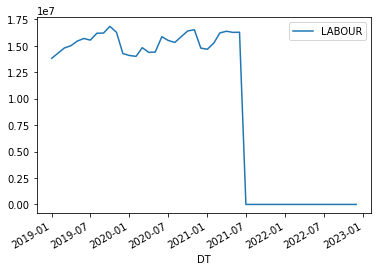

In [83]:
df[df['DT']>'2018-2-01'].set_index('DT').groupby(['DT']).sum().plot(y='LABOUR')


In [84]:
df.head()

,DT,MCCO,BU_REPORTED,ACCT,LABOUR,REV,PROD,PAYMENTS_W,PAYMENTS_F,HOLIDAY_CNT,ID
0,2019-01-01,00028,028000,641111.PROD,0.0,0.0,0.0,0,0,1,028000-641111.PROD
1,2019-02-01,00028,028000,641111.PROD,0.0,0.0,0.0,0,0,0,028000-641111.PROD
2,2019-03-01,00028,028000,641111.PROD,0.0,0.0,0.0,0,0,1,028000-641111.PROD
3,2019-04-01,00028,028000,641111.PROD,0.0,0.0,0.0,0,0,1,028000-641111.PROD
4,2019-05-01,00028,028000,641111.PROD,0.0,0.0,0.0,0,0,0,028000-641111.PROD


In [85]:
ACCT = df.drop(columns =['REV','MCCO','ACCT','BU_REPORTED'])

In [87]:
ACCT_BK =ACCT
ACCT.head()

,DT,LABOUR,PROD,PAYMENTS_W,PAYMENTS_F,HOLIDAY_CNT,ID
0,2019-01-01,0.0,0.0,0,0,1,028000-641111.PROD
1,2019-02-01,0.0,0.0,0,0,0,028000-641111.PROD
2,2019-03-01,0.0,0.0,0,0,1,028000-641111.PROD
3,2019-04-01,0.0,0.0,0,0,1,028000-641111.PROD
4,2019-05-01,0.0,0.0,0,0,0,028000-641111.PROD


In [88]:
data=ACCT.copy()
data=create_date_featues(data)
data.head()


month_in_year = 12
quater_in_year =4

data['sin_month'] = np.sin(2*np.pi*data['Month']/month_in_year)
data['cos_month'] = np.cos(2*np.pi*data['Month']/month_in_year)
data['sin_quater'] = np.sin(2*np.pi*data['Quarter']/quater_in_year)
data['cos_quater'] = np.cos(2*np.pi*data['Quarter']/quater_in_year)

data.drop('Month', axis=1, inplace=True)
data.drop('Quarter', axis=1, inplace=True)


data_BK=data

columns = ['ID','DT','PROD', 'Prediction']
df_final=pd.DataFrame(columns=columns)

id_list=data['ID'].unique()

for ID in id_list:
    data_model = data[data['ID']==ID]
    # if we have data for 2020 
    del data_model['ID']
    if len(data_model[data_model['DT']>'2019-12-02'])> 0:
        train=data_model[data_model['DT']<=traindate]
        test=data_model[data_model['DT']>=testdate]
        train.set_index(['DT'],inplace=True)
        test.set_index(['DT'],inplace=True)
        x_train=train.drop(columns={'LABOUR'},axis=1)
        y_train=train.loc[:,['LABOUR']]
        x_test=test.drop(columns={'LABOUR'},axis=1)
        y_test=test.loc[:,['LABOUR']]
        reg = xgb.XGBRegressor(n_estimators=1000)
        reg.fit(x_train, y_train, 
                eval_set=[(x_train, y_train)],
                early_stopping_rounds=50,
                verbose=False) 
        test['Prediction'] = reg.predict(x_test)
        df=test
        df['ID']=ID
        df_final=df_final.append(df)
        print(reg.feature_importances_)
    else: df_final=df_final

xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[16:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[16:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[16:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[16:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[16:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[16:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[16:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1238: Empty dataset at worker: 0
[16:10:06] WARNING: C

In [89]:
df_final.head()

,ID,DT,PROD,Prediction,LABOUR,PAYMENTS_W,PAYMENTS_F,HOLIDAY_CNT,Year,sin_month,cos_month,sin_quater,cos_quater
2021-07-01,028000-641111.PROD,NaN,0.0,4.404568e-07,0.0,0.0,0.0,0.0,2021.0,-0.5,-0.866025,-1.0,-1.836970e-16
2021-07-01,028000-641111.PROD,NaN,0.0,4.404568e-07,0.0,0.0,0.0,0.0,2021.0,-0.5,-0.866025,-1.0,-1.836970e-16
2021-07-01,028000-641111.PROD,NaN,0.0,4.404568e-07,0.0,0.0,0.0,0.0,2021.0,-0.5,-0.866025,-1.0,-1.836970e-16
2021-07-01,028000-641111.PROD,NaN,0.0,4.404568e-07,0.0,0.0,0.0,0.0,2021.0,-0.5,-0.866025,-1.0,-1.836970e-16
2021-07-01,028000-641111.PROD,NaN,0.0,4.404568e-07,0.0,0.0,0.0,0.0,2021.0,-0.5,-0.866025,-1.0,-1.836970e-16


In [90]:
cols =['ID','Prediction']
df_ACCT = df_final[cols]
df_ACCT=df_ACCT.reset_index()

df_ACCT[['BU_REPORTED', 'ACCT']] = df_ACCT['ID'].str.split('-', expand=True)


df_ACCT.loc[((df_ACCT['Prediction']<2) & (df_ACCT['Prediction']>-2)), 'Prediction'] = 0
df_ACCT.loc[df_ACCT['ID'].isin(zero_list), 'Prediction'] = 0

df_ACCT.head()

,index,ID,Prediction,BU_REPORTED,ACCT
0,2021-07-01,028000-641111.PROD,0.0,028000,641111.PROD
1,2021-07-01,028000-641111.PROD,0.0,028000,641111.PROD
2,2021-07-01,028000-641111.PROD,0.0,028000,641111.PROD
3,2021-07-01,028000-641111.PROD,0.0,028000,641111.PROD
4,2021-07-01,028000-641111.PROD,0.0,028000,641111.PROD


In [91]:
filename = "%s_%s.%s" % ("ACCT", _getToday() ,"csv")

df_ACCT.to_csv(outpath + "\\" + filename)